In [1]:
import pandas as pd

# OPD Crimes dataset

In [2]:
opd = pd.read_csv("opd_crimes.csv")

In [3]:
opd.head()

Case Number          Case Date Time                   Case Location  \
0  2013-00074238  02/19/2013 12:41:00 PM        200 Block of N TAMPA AVE   
1  2014-00326276  08/06/2014 02:55:00 AM       8600 Block of ANDREAS AVE   
2  2014-00451565  10/30/2014 10:15:00 PM    1900 Block of METROCENTER BV   
3  2016-00007509  01/06/2016 10:39:00 AM         1500 Block of AARON AVE   
4  2011-00442271  10/06/2011 06:55:00 AM  W JACKSON ST / S PARRAMORE AVE   

   Case Offense Location Type Case Offense Category  Case Offense Type  \
0  Commercial/Office Building               Assault     Simple assault   
1           Construction Site                 Theft  All other larceny   
2  Commercial/Office Building                 Theft  All other larceny   
3                      School               Assault     Simple assault   
4       Parking Lot - Surface               Assault     Simple assault   

  Case Offense Charge Type Case Disposition  Status  \
0                Committed           Closed  Mapped   
1                Committed           Closed  Mapped   
2                Committed           Closed  Mapped   
3                Committed           Closed  Mapped   
4                Attempted           Arrest  Mapped   

                      Location  
0  (28.54518403, -81.40556136)  
1  (28.44153996, -81.23261223)  
2  (28.51884164, -81.46848512)  
3  (28.52377872, -81.43230433)  
4  (28.53921282, -81.38900691)

In [4]:
opd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181260 entries, 0 to 181259
Data columns (total 10 columns):
Case Number                   181260 non-null object
Case Date Time                181258 non-null object
Case Location                 181260 non-null object
Case Offense Location Type    181260 non-null object
Case Offense Category         181260 non-null object
Case Offense Type             181260 non-null object
Case Offense Charge Type      181260 non-null object
Case Disposition              181260 non-null object
Status                        181260 non-null object
Location                      174368 non-null object
dtypes: object(10)
memory usage: 13.8+ MB


In [5]:
dir(opd)

['Location',
 'Status',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__redu

In [6]:
opd.Location

0         (28.54518403, -81.40556136)
1         (28.44153996, -81.23261223)
2         (28.51884164, -81.46848512)
3         (28.52377872, -81.43230433)
4         (28.53921282, -81.38900691)
                     ...             
181255    (28.60561255, -81.44706923)
181256    (28.50884371, -81.46514312)
181257    (28.57798444, -81.44635373)
181258    (28.54308365, -81.37905511)
181259    (28.47391409, -81.44958996)
Name: Location, Length: 181260, dtype: object

In [7]:
opd["Case Location"]

0               200 Block of N TAMPA AVE
1              8600 Block of ANDREAS AVE
2           1900 Block of METROCENTER BV
3                1500 Block of AARON AVE
4         W JACKSON ST / S PARRAMORE AVE
                       ...              
181255       5100 Block of LIGHTHOUSE RD
181256        6000 Block of STEVENSON DR
181257      4800 Block of SILVER STAR RD
181258           1 Block of N ORANGE AVE
181259    4900 Block of INTERNATIONAL DR
Name: Case Location, Length: 181260, dtype: object

In [8]:
opd.columns

Index(['Case Number', 'Case Date Time', 'Case Location',
       'Case Offense Location Type', 'Case Offense Category',
       'Case Offense Type', 'Case Offense Charge Type', 'Case Disposition',
       'Status', 'Location'],
      dtype='object')

In [9]:
opd.rename(columns={
    "Case Date Time": "timestamp",
    "Case Location": "address",
    "Location": "coordinate",
}, inplace=True)

In [10]:
opd.columns

Index(['Case Number', 'timestamp', 'address', 'Case Offense Location Type',
       'Case Offense Category', 'Case Offense Type',
       'Case Offense Charge Type', 'Case Disposition', 'Status', 'coordinate'],
      dtype='object')

In [11]:
opd.columns = opd.columns.str.lower().str.replace(" ", "_").str.replace("case_", "")

In [12]:
opd.columns

Index(['number', 'timestamp', 'address', 'offense_location_type',
       'offense_category', 'offense_type', 'offense_charge_type',
       'disposition', 'status', 'coordinate'],
      dtype='object')

In [13]:
opd.offense_location_type

0          Commercial/Office Building
1                   Construction Site
2          Commercial/Office Building
3                              School
4               Parking Lot - Surface
                     ...             
181255             Highway/Road/Alley
181256                Apartment/Condo
181257               Residence/Single
181258    Bar/Night Club/Country Club
181259                           Mall
Name: offense_location_type, Length: 181260, dtype: object

In [14]:
print(len(opd))
opd.drop_duplicates(inplace=True)
print(len(opd))
opd.dropna(inplace=True)
print(len(opd))

181260
181260
174368


In [15]:
opd.offense_location_type.unique()

array(['Commercial/Office Building', 'Construction Site', 'School',
       'Parking Lot - Surface', 'Highway/Road/Alley', 'Apartment/Condo',
       'Specialty Store', 'Department/Discount Store', 'Residence/Single',
       'Jail/Prison', 'Motor Vechicle', 'Airport', 'Theme Park',
       'Restaurant/Fast Food', 'Grocery/Supermarket', 'Bus/Rail Terminal',
       'Barber/Beauty Shop', 'Hotel/Motel', 'Bank/Financial Institution',
       'Mall', 'Convenience Store', 'Bar/Night Club/Country Club',
       'Residence/Other', 'Vacant House', 'Drug Store', 'Gas Station',
       'Clothing Store', 'Parking Garage', 'Other', 'Storage Unit',
       'Church/Religious Building', 'Recreation Facility', 'Field/Woods',
       'Parking Lot - Mall', 'Auto Parts Store', 'Liquor/Beer/Wine Store',
       'Restaurant/Other', 'Restaurant/Fine Dining', 'Industrial/Mfg',
       'Governemnt Building or Property', 'Electronic Store',
       'Auto Dealer/Car Lot', 'Sporting Goods', 'Doctor/Dental Office',
       'Ha

In [16]:
opd.status.unique()

array(['Mapped'], dtype=object)

In [17]:
opd.drop(columns="status", inplace=True)

In [18]:
opd.columns

Index(['number', 'timestamp', 'address', 'offense_location_type',
       'offense_category', 'offense_type', 'offense_charge_type',
       'disposition', 'coordinate'],
      dtype='object')

In [19]:
opd.head()

number               timestamp                         address  \
0  2013-00074238  02/19/2013 12:41:00 PM        200 Block of N TAMPA AVE   
1  2014-00326276  08/06/2014 02:55:00 AM       8600 Block of ANDREAS AVE   
2  2014-00451565  10/30/2014 10:15:00 PM    1900 Block of METROCENTER BV   
3  2016-00007509  01/06/2016 10:39:00 AM         1500 Block of AARON AVE   
4  2011-00442271  10/06/2011 06:55:00 AM  W JACKSON ST / S PARRAMORE AVE   

        offense_location_type offense_category       offense_type  \
0  Commercial/Office Building          Assault     Simple assault   
1           Construction Site            Theft  All other larceny   
2  Commercial/Office Building            Theft  All other larceny   
3                      School          Assault     Simple assault   
4       Parking Lot - Surface          Assault     Simple assault   

  offense_charge_type disposition                   coordinate  
0           Committed      Closed  (28.54518403, -81.40556136)  
1           Committed      Closed  (28.44153996, -81.23261223)  
2           Committed      Closed  (28.51884164, -81.46848512)  
3           Committed      Closed  (28.52377872, -81.43230433)  
4           Attempted      Arrest  (28.53921282, -81.38900691)

In [20]:
opd.coordinate

0         (28.54518403, -81.40556136)
1         (28.44153996, -81.23261223)
2         (28.51884164, -81.46848512)
3         (28.52377872, -81.43230433)
4         (28.53921282, -81.38900691)
                     ...             
181255    (28.60561255, -81.44706923)
181256    (28.50884371, -81.46514312)
181257    (28.57798444, -81.44635373)
181258    (28.54308365, -81.37905511)
181259    (28.47391409, -81.44958996)
Name: coordinate, Length: 174368, dtype: object

In [21]:
lats, lons = [] , []

for coord in opd.coordinate:
    lat, lon = coord.strip("()").split(", ")
    lats.append(float(lat))
    lons.append(float(lon))

print(lats[:5])
print(lons[:5])

[28.54518403, 28.44153996, 28.51884164, 28.52377872, 28.53921282]
[-81.40556136, -81.23261223, -81.46848512, -81.43230433, -81.38900691]


In [22]:
opd["latitude"] = lats
opd["longitude"] = lons
opd.drop(columns="coordinate", inplace=True)

In [23]:
opd.head()

number               timestamp                         address  \
0  2013-00074238  02/19/2013 12:41:00 PM        200 Block of N TAMPA AVE   
1  2014-00326276  08/06/2014 02:55:00 AM       8600 Block of ANDREAS AVE   
2  2014-00451565  10/30/2014 10:15:00 PM    1900 Block of METROCENTER BV   
3  2016-00007509  01/06/2016 10:39:00 AM         1500 Block of AARON AVE   
4  2011-00442271  10/06/2011 06:55:00 AM  W JACKSON ST / S PARRAMORE AVE   

        offense_location_type offense_category       offense_type  \
0  Commercial/Office Building          Assault     Simple assault   
1           Construction Site            Theft  All other larceny   
2  Commercial/Office Building            Theft  All other larceny   
3                      School          Assault     Simple assault   
4       Parking Lot - Surface          Assault     Simple assault   

  offense_charge_type disposition   latitude  longitude  
0           Committed      Closed  28.545184 -81.405561  
1           Committed      Closed  28.441540 -81.232612  
2           Committed      Closed  28.518842 -81.468485  
3           Committed      Closed  28.523779 -81.432304  
4           Attempted      Arrest  28.539213 -81.389007

In [24]:
opd.latitude

0         28.545184
1         28.441540
2         28.518842
3         28.523779
4         28.539213
            ...    
181255    28.605613
181256    28.508844
181257    28.577984
181258    28.543084
181259    28.473914
Name: latitude, Length: 174368, dtype: float64

In [25]:
opd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174368 entries, 0 to 181259
Data columns (total 10 columns):
number                   174368 non-null object
timestamp                174368 non-null object
address                  174368 non-null object
offense_location_type    174368 non-null object
offense_category         174368 non-null object
offense_type             174368 non-null object
offense_charge_type      174368 non-null object
disposition              174368 non-null object
latitude                 174368 non-null float64
longitude                174368 non-null float64
dtypes: float64(2), object(8)
memory usage: 14.6+ MB


In [26]:
opd.timestamp

0         02/19/2013 12:41:00 PM
1         08/06/2014 02:55:00 AM
2         10/30/2014 10:15:00 PM
3         01/06/2016 10:39:00 AM
4         10/06/2011 06:55:00 AM
                   ...          
181255    02/13/2012 09:36:00 AM
181256    12/31/2012 11:17:00 AM
181257    02/06/2014 03:34:00 PM
181258    11/08/2013 02:39:00 PM
181259    06/24/2015 09:05:00 PM
Name: timestamp, Length: 174368, dtype: object

In [27]:
opd.timestamp = pd.to_datetime(opd.timestamp, format="%m/%d/%Y %I:%M:%S %p")

In [28]:
opd.head()

number           timestamp                         address  \
0  2013-00074238 2013-02-19 12:41:00        200 Block of N TAMPA AVE   
1  2014-00326276 2014-08-06 02:55:00       8600 Block of ANDREAS AVE   
2  2014-00451565 2014-10-30 22:15:00    1900 Block of METROCENTER BV   
3  2016-00007509 2016-01-06 10:39:00         1500 Block of AARON AVE   
4  2011-00442271 2011-10-06 06:55:00  W JACKSON ST / S PARRAMORE AVE   

        offense_location_type offense_category       offense_type  \
0  Commercial/Office Building          Assault     Simple assault   
1           Construction Site            Theft  All other larceny   
2  Commercial/Office Building            Theft  All other larceny   
3                      School          Assault     Simple assault   
4       Parking Lot - Surface          Assault     Simple assault   

  offense_charge_type disposition   latitude  longitude  
0           Committed      Closed  28.545184 -81.405561  
1           Committed      Closed  28.441540 -81.232612  
2           Committed      Closed  28.518842 -81.468485  
3           Committed      Closed  28.523779 -81.432304  
4           Attempted      Arrest  28.539213 -81.389007

In [29]:
opd.offense_charge_type.unique()

array(['Committed', 'Attempted'], dtype=object)

In [30]:
opd.offense_charge_type.value_counts()

Committed    164993
Attempted      9375
Name: offense_charge_type, dtype: int64

In [31]:
opd.offense_charge_type.value_counts().plot.bar()

In [32]:
opd.offense_category.value_counts()

Theft            86706
Burglary         25129
Assault          19022
Narcotics        18299
Fraud            11255
Vehicle Theft     8627
Robbery           4828
Arson              236
Homicide           140
Kidnapping          87
Embezzlement        38
Bribery              1
Name: offense_category, dtype: int64

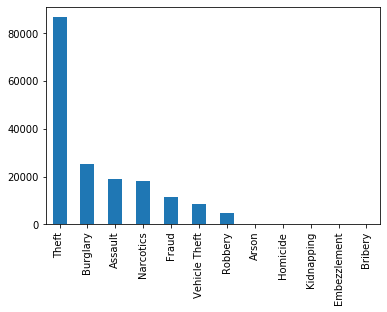

In [33]:
opd.offense_category.value_counts().plot.bar()

In [34]:
dir(opd.offense_category.plot)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_all_kinds',
 '_common_kinds',
 '_constructor',
 '_dataframe_kinds',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_get_call_args',
 '_kind_aliases',
 '_reset_cache',
 '_series_kinds',
 'area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

In [35]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [36]:
# create a new plot with the tools above, and explicit ranges
p = figure(
    x_range=(opd.longitude.min(), opd.longitude.max()),
    y_range=(opd.latitude.min(), opd.latitude.max())
)

# add a circle renderer with vectorized colors and sizes
p.circle(opd.longitude, opd.latitude, fill_alpha=0.6, line_color=None)

# show the results
show(p)

In [37]:
opd[opd.offense_category == "Assault"][opd.offense_location_type == "School"]

/Users/mdupont/anaconda3/envs/ws/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


number           timestamp                       address  \
3       2016-00007509 2016-01-06 10:39:00       1500 Block of AARON AVE   
55      2012-00225660 2012-05-29 14:53:00    3100 Block of EDGEWATER DR   
322     2016-00035513 2016-01-25 14:35:00  6000 Block of S GOLDENROD RD   
647     2014-00477410 2014-11-18 10:25:00    800 Block of E ROBINSON ST   
961     2012-00427539 2012-10-15 11:34:00  13700 Block of NARCOOSSEE RD   
...               ...                 ...                           ...   
180918  2011-00201639 2011-05-06 11:41:00   2900 Block of UPPER PARK RD   
180950  2012-00214453 2012-05-22 08:03:00  6500 Block of TURKEY LAKE RD   
181080  2015-00177290 2015-04-30 14:00:00     2500 Block of S MILLS AVE   
181180  2013-00467449 2013-11-07 14:48:00    400 Block of N PRIMROSE DR   
181245  2012-00439712 2012-10-23 15:09:00        500 Block of S EOLA DR   

       offense_location_type offense_category        offense_type  \
3                     School          Assault      Simple assault   
55                    School          Assault      Simple assault   
322                   School          Assault      Simple assault   
647                   School          Assault      Simple assault   
961                   School          Assault      Simple assault   
...                      ...              ...                 ...   
180918                School          Assault      Simple assault   
180950                School          Assault      Simple assault   
181080                School          Assault      Simple assault   
181180                School          Assault      Simple assault   
181245                School          Assault  Aggravated assault   

       offense_charge_type disposition   latitude  longitude  
3                Committed      Closed  28.523779 -81.432304  
55               Committed    Inactive  28.578863 -81.389561  
322              Committed      Closed  28.475263 -81.289789  
647              Committed      Arrest  28.545759 -81.367726  
961              Committed    Inactive  28.369091 -81.244432  
...                    ...         ...        ...        ...  
180918           Committed      Closed  28.577553 -81.334969  
180950           Committed      Arrest  28.468211 -81.474935  
181080           Committed    Inactive  28.514676 -81.363991  
181180           Committed      Closed  28.548660 -81.347841  
181245           Committed    Inactive  28.535753 -81.369723  

[958 rows x 10 columns]

In [38]:
from datetime import datetime, timedelta

In [39]:
xmas = datetime(year=2017, month=12, day=25)

In [40]:
opd[opd.offense_category == "Assault"][(xmas-timedelta(days=1)) < opd.timestamp]

/Users/mdupont/anaconda3/envs/ws/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


number           timestamp  \
457     2017-00510332 2017-12-29 17:27:00   
2364    2017-00508481 2017-12-28 09:18:00   
2643    2017-00505069 2017-12-25 09:53:00   
2802    2017-00504794 2017-12-25 00:42:00   
4545    2017-00507358 2017-12-27 12:50:00   
15732   2017-00503848 2017-12-24 02:24:00   
22247   2017-00503762 2017-12-24 00:18:00   
24676   2017-00508645 2017-12-28 11:49:00   
35087   2017-00507471 2017-12-27 14:14:00   
36322   2017-00506649 2017-12-26 21:17:00   
39688   2017-00503887 2017-12-24 03:04:00   
42019   2017-00506297 2017-12-26 15:35:00   
46340   2017-00503881 2017-12-24 02:57:00   
49705   2017-00503829 2017-12-24 01:46:00   
50940   2017-00508704 2017-12-28 12:45:00   
60104   2017-00510459 2017-12-29 19:31:00   
60643   2017-00504983 2017-12-25 07:26:00   
69773   2017-00508177 2017-12-28 01:31:00   
71311   2017-00503845 2017-12-24 02:18:00   
72720   2017-00505421 2017-12-25 19:22:00   
83889   2017-00505640 2017-12-26 00:48:00   
84215   2017-00512301 2017-12-31 09:28:00   
86322   2017-00509915 2017-12-29 10:42:00   
87884   2017-00510304 2017-12-29 16:53:00   
88281   2017-00504387 2017-12-24 15:57:00   
95389   2017-00507192 2017-12-27 10:13:00   
107059  2017-00506169 2017-12-26 13:41:00   
112271  2017-00510676 2017-12-29 23:19:00   
119678  2017-00504904 2017-12-25 03:49:00   
119827  2017-00504225 2017-12-24 12:40:00   
120374  2017-00512115 2017-12-31 02:22:00   
121494  2017-00505954 2017-12-26 09:57:00   
123179  2017-00510486 2017-12-29 20:06:00   
124255  2017-00504480 2017-12-24 17:29:00   
126230  2017-00508666 2017-12-28 12:07:00   
129850  2017-00505665 2017-12-26 01:26:00   
134263  2017-00507387 2017-12-27 13:07:00   
137957  2017-00509634 2017-12-29 04:44:00   
141532  2017-00505653 2017-12-26 01:12:00   
142825  2017-00505742 2017-12-26 04:32:00   
152285  2017-00508198 2017-12-28 02:05:00   
152996  2017-00506178 2017-12-26 13:54:00   
172239  2017-00511561 2017-12-30 17:35:00   
178161  2017-00504553 2017-12-24 19:08:00   
178253  2017-00510965 2017-12-30 05:42:00   
178664  2017-00503882 2017-12-24 02:58:00   

                                    address            offense_location_type  \
457             3000 Block of E COLONIAL DR               Highway/Road/Alley   
2364              800 Block of W JACKSON ST                  Apartment/Condo   
2643             2000 Block of W JACKSON ST                 Residence/Single   
2802              4700 Block of PIEDMONT CT                 Residence/Single   
4545            6300 Block of HOLLYWOOD WAY                      Hotel/Motel   
15732               1 Block of S ORANGE AVE               Highway/Road/Alley   
22247            9400 Block of AIRPORT BLVD                          Airport   
24676           1800 Block of E MICHIGAN ST  Governemnt Building or Property   
35087               6300 Block of BUFORD ST            Parking Lot - Surface   
36322     400 Block of N ORANGE BLOSSOM TRL            Parking Lot - Surface   
39688             700 Block of W JACKSON ST               Highway/Road/Alley   
42019          3100 Block of W PRINCETON ST                            Other   
46340             300 Block of N ORANGE AVE      Bar/Night Club/Country Club   
49705               1 Block of N ORANGE AVE               Highway/Road/Alley   
50940             800 Block of W JACKSON ST                  Apartment/Condo   
60104            5200 Block of GOLD TREE CT                 Residence/Single   
60643           100 Block of N ROSALIND AVE                      Field/Woods   
69773     500 Block of S ORANGE BLOSSOM TRL                      Gas Station   
71311    1100 Block of S ORANGE BLOSSOM TRL      Bar/Night Club/Country Club   
72720           4900 Block of LUNA NEGRA DR                  Apartment/Condo   
83889           1200 Block of W COLONIAL DR                Convenience Store   
84215               700 Block of BOSTON AVE                  Apartment/Condo   
86322            2500 Block of S KIRKMAN RD        Departme

In [41]:
opd.to_csv("clean_opd.csv")